# PRJEB76651 - Garcia et al.

Article link: [https://doi.org/10.1186/s12864-025-11255-z](https://doi.org/10.1186/s12864-025-11255-z).

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})

prj <- "PRJEB76651"
lineages_in_paper <- c("BA.5", "BA.2.75", "XBB.1.5", "BQ.1", "BA.2.86", "XBB", "BA.1")


In [2]:
coco <- read.csv(
  here(
    "data/processed/",
    paste0(prj, "_processed.csv.gz")
  )
)
coco$mutation <- parse_mutations(coco$label)
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,23034,-23035.1,del:23035:1,0.1362374320,301459,41070,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
2,23103,-23104.1,del:23104:1,0.1521501727,304929,46395,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
3,23143,-23144.1,del:23144:1,0.1622145443,303900,49297,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
4,23230,-23231.1,del:23231:1,0.2175167010,304772,66293,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
5,23515,-23516.1,del:23516:1,0.1001488125,303738,30419,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
6,22839,~22840G,A22840G,0.0006503453,302916,197,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen


In [3]:
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
dim(barcodes)


[1]   7 164

In [4]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


   user  system elapsed 
  0.448   0.004   0.460 

,rho,ci_low,ci_high,lineage,sra,date,sample_name,avg_spot_len,bases,bioproject,location
,<dbl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,4.763149e-02,NA,NA,BA.2.86,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
2,6.848944e-01,NA,NA,XBB.1.5,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
3,4.670105e-10,NA,NA,XBB,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
4,1.353537e-09,NA,NA,BA.2.75,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
5,9.459543e-05,NA,NA,BQ.1,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen
6,8.050850e-02,NA,NA,BA.5,ERR13743911,2023-03-27,Waste023.2023-03-27_Bergen,1189,365010712,PRJEB76651,Bergen


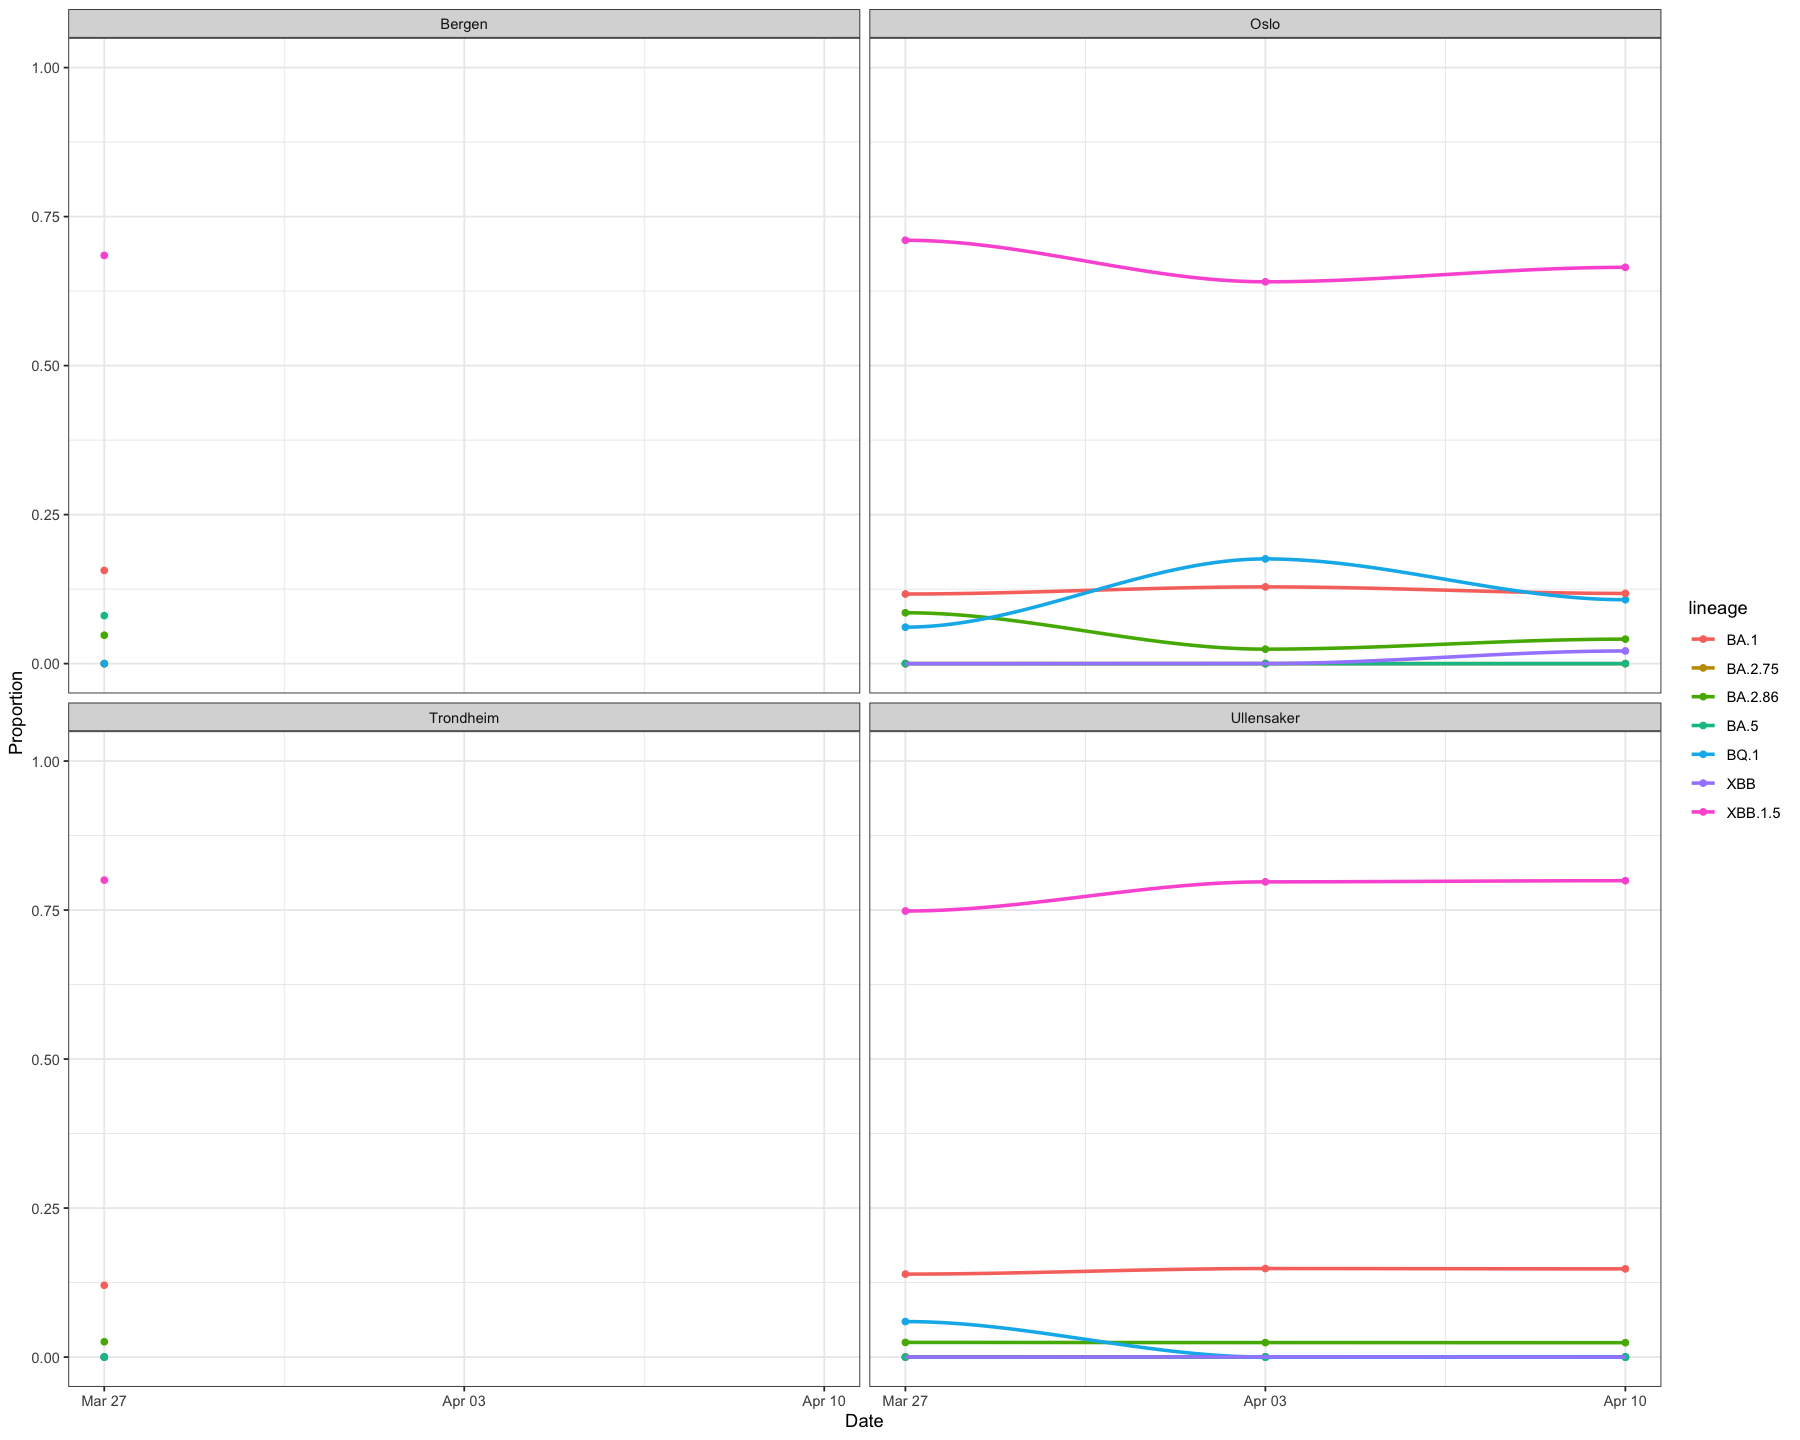

In [5]:
options(repr.plot.width = 15, repr.plot.height = 12)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") + facet_wrap(~location) +
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
